# Week 9 Problem Set

## Homeworks

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**HW0.** Copy and paste some of the functions from you cohort sessions and previous exercises that you will need in this homework. See below template and the list here:
- `normalize_z()`
- `get_features_targets()`
- `prepare_feature()`
- `prepare_target()`
- `predict()`
- `predict_norm()`
- `split_data()`
- `r2_score()`
- `mean_squared_error()`

Then do the following:
- Read the CSV file `housing_processed.csv` and extract the following columns:
    - x data: RM, DIS, and INDUS columns 
    - y data: MEDV column
- Normalize the features using z normalization. 
- Plot the data using scatter plot. Use the following columns:


In [43]:
def normalize_z(df):
    dfout = (df - df.mean(axis=0))/df.std(axis=0)
    return dfout

def get_features_targets(df, features_names, target_names):
    df_features = df[features_names]
    df_target = df[target_names]
    return df_features, df_target

def prepare_feature(df_features):
    feature_value = df_features.to_numpy()
    ones = np.ones((df_features.shape[0], 1))
    X = np.concatenate((ones, feature_value), axis=1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy()


def predict(df_features, beta):
    features_norm = normalize_z(df_features)
    X = prepare_feature(features_norm)
    return predict_norm(X,beta)


def predict_norm(X, beta):
    return np.matmul(X, beta)

def split_data(df_features, df_target, random_state=None, test_size=0.5):
    indexes = df_features.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes)) # 0.3 * 506 --> 151 
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index # set subtraction

    df_features_train = df_features.loc[train_index, :] # select the rows as per train_index, and all its columns
    df_features_test = df_features.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_features_train, df_features_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ### BEGIN SOLUTION
    y_mean = np.mean(y) # actual mean
    sstot = np.sum((y-y_mean)**2)
    ssres = np.sum((y-ypred)**2)
    return 1 - (ssres/sstot)

def mean_squared_error(target, pred):
    ### BEGIN SOLUTION
    num_samples = target.shape[0]
    mse = 1/(num_samples) * np.sum((target-pred)**2)
    return mse
    ### END SOLUTION



In [44]:
# Read the CSV file
df = pd.read_csv("housing_processed.csv")

# Extract the features and the targets
df_features, df_target = get_features_targets(df, ["RM","DIS","INDUS"], ["MEDV"])

# Normalize using z normalization
df_features = normalize_z(df_features)


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [46]:
display(df_features.describe())
display(df_target.describe())
assert np.isclose(df_features['RM'].mean(), 0)
assert np.isclose(df_features['DIS'].mean(), 0)
assert np.isclose(df_features['INDUS'].mean(), 0)

assert np.isclose(df_features['RM'].std(), 1)
assert np.isclose(df_features['DIS'].std(), 1)
assert np.isclose(df_features['INDUS'].std(), 1)

assert np.isclose(df_target['MEDV'].mean(), 22.532806)
assert np.isclose(df_target['MEDV'].std(), 9.197104)

assert np.isclose(df_features['RM'].median(), -0.1083583)
assert np.isclose(df_features['DIS'].median(), -0.2790473)
assert np.isclose(df_features['INDUS'].median(), -0.2108898)

,RM,DIS,INDUS
count,5.060000e+02,5.060000e+02,5.060000e+02
mean,-9.478584e-17,-1.404235e-16,3.089316e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.876413e+00,-1.265817e+00,-1.556302e+00
25%,-5.680681e-01,-8.048913e-01,-8.668328e-01
50%,-1.083583e-01,-2.790473e-01,-2.108898e-01
75%,4.822906e-01,6.617161e-01,1.014995e+00
max,3.551530e+00,3.956602e+00,2.420170e+00


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


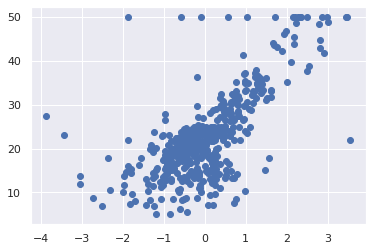

In [48]:
sns.set()
plt.scatter(df_features["RM"], df_target)

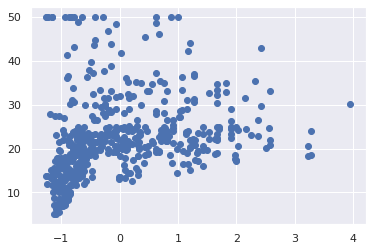

In [49]:
plt.scatter(df_features["DIS"], df_target)

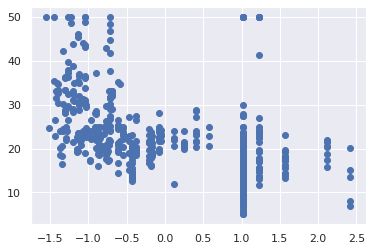

In [50]:
plt.scatter(df_features["INDUS"], df_target)

**HW1.** *Multiple variables cost function:* Write a function `compute_cost_multi()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x) =  \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \ldots + \hat{\beta}_n x_n$$

The function should receive three Numpy arrays:
- `X`: is the feature 2D Numpy array
- `y`: is the target 2D Numpy array
- `beta`: is the parameter 2D Numpy array

The function should return the cost which is a float.

You can use the following function in your code:
- `np.matmul(array1, array2)`

Note that if you wrote your Cohort session's `compute_cost()` using proper Matrix operations to do the square and the summation, the code will be exactly the same here.

In [51]:
def compute_cost(X, y, beta):
    J = 0
    m = y.shape[0]
    yp = np.matmul(X, beta)
    error = yp - y
    J = (1 / (2*m))*np.matmul(error.T, error)
    J = J[0][0]
#     print(J, J[0], J[0][0])
    return J

# beta = np.zeros((2,1))
# J = compute_cost()

In [52]:
X = prepare_feature(df_features)
target = prepare_target(df_target)

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 4)
assert target.shape == (506, 1)

In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [54]:
beta = np.zeros((4,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 296.0734)

beta = np.ones((4,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 270.4083)

beta = np.array([-1, 2, 1, 2]).reshape((4,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 314.8510)


296.07345849802374
270.40834049507566
314.8509513115608


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Gradient Descent:* Write a function called `gradient_descent_multi()` that takes in four parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost()`: which the function you created in the previous problem set to compute the cost.

Note that if you use proper matrix operations in your cohort sessions for the gradient descent function, the code will be the same here.

In [56]:
def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from the shape of X or Y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
#     num_iters = 1
    #compute the predicted y
    for n in range(num_iters):
    #compute the error
        yp = np.matmul(X, beta)
        error = yp - y
#         print(yp.shape)
        beta = beta - (alpha / m) * np.matmul(X.T, error)
        
    #compute the new dbeta
    #compute J usin the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
#         print(J_storage[n])
    #return beta,J_storage
    return beta, J_storage


In [57]:
iterations = 1500
alpha = 0.01
beta = np.zeros((4,1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
assert np.isclose(beta[0], 22.5328)
assert np.isclose(beta[1], 5.4239)
assert np.isclose(beta[2], -0.90367)
assert np.isclose(beta[3], -2.95818)

[[22.53279993]
 [ 5.42386374]
 [-0.90367449]
 [-2.95818095]]


In [58]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


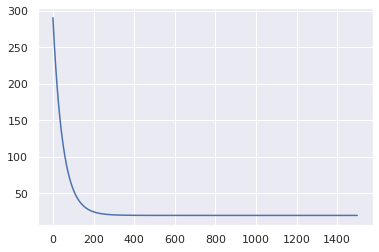

In [59]:
plt.plot(J_storage)

**HW3.** Do the following tasks:
- Get the features and the targets.
    - features: RM, DIS, INDUS
    - target: MEDV
- Use the previous functions called `predict()` to calculated the predicted values given the features and the model. 
- Create a target numpy array from the data frame.

In [60]:
# This is from the previous result
beta = np.array([[22.53279993],
       [ 5.42386374],
       [-0.90367449],
       [-2.95818095]])

# Extract the feature and the target
df_features, df_target = get_features_targets(df,["RM", "DIS", "INDUS"],["MEDV"])

# Call predict()
pred = predict(df_features,beta)

# Change target to numpy array
target = df_target.to_numpy()

###
### YOUR CODE HERE
###



In [61]:
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.5328)
assert np.isclose(pred.std(), 6.7577)

In [62]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


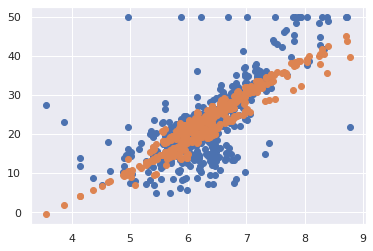

In [63]:
plt.scatter(df_features["RM"],target)
plt.scatter(df_features["RM"],pred)
### END HIDDEN TESTS

In [64]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [65]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW4.** *Splitting data:*  Do the following tasks:
- Extract the following:
    - features: RM, DIS, and INDUS
    - target: MEDV 
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`.
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [66]:
# Extract the features and the target
df_features, df_target = get_features_targets(df,["RM", "DIS", "INDUS"],["MEDV"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((4,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

###
### YOUR CODE HERE
###


In [67]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [68]:
assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
assert np.isclose(pred.mean(), 22.66816)
assert np.isclose(pred.std(), 6.67324)

In [69]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


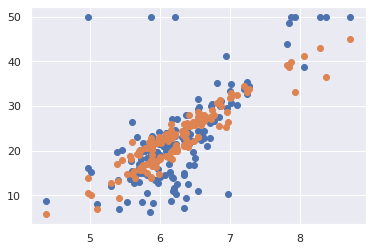

In [70]:
plt.scatter(df_features_test["RM"], df_target_test)
plt.scatter(df_features_test["RM"], pred)

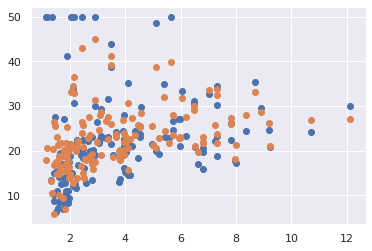

In [71]:
plt.scatter(df_features_test["DIS"], df_target_test)
plt.scatter(df_features_test["DIS"], pred)

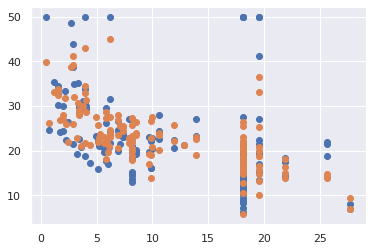

In [72]:
plt.scatter(df_features_test["INDUS"], df_target_test)
plt.scatter(df_features_test["INDUS"], pred)

**HW5.** Calculate the coefficient of determination, $r^2$.

In [75]:
# change target test set to a numpy array
target = prepare_target(df_target_test)
# Calculate r2 score by calling a function
r2 = r2_score(target, pred)

###
### YOUR CODE HERE
###

print(r2)


0.4771347202218983


In [76]:
assert np.isclose(r2, 0.47713)

In [77]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW6.** Calculate the mean squared error.

In [78]:
# Calculate the mse
mse = mean_squared_error(target, pred)

###
### YOUR CODE HERE
###
print(mse)


51.36298842680588


In [79]:
assert np.isclose(mse, 51.363)

In [80]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW7.** *Polynomial Transformation:* Redo the steps for breast cancer data but this time we will use quadratic model. Use the following columns:
- x data: radius_mean
- y data: area_mean

We will create a quadratic hypothesis for this x and y data. To do that write a function `transform_features(df, colname, colname_transformed)` that takes in a dataframe for the features, the original column name, and the transformed column name. The function should add another column with the name `colname_transformed` with the value of column in `colname` transformed to its quadratic value. 

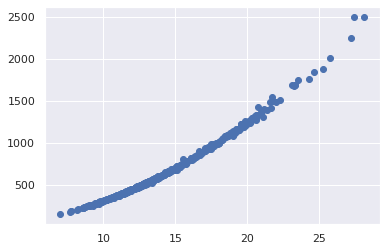

In [84]:
# Read from breast_cancer_data.csv file
df = pd.read_csv("breast_cancer_data.csv")

# Extract feature and target
df_feature, df_target = get_features_targets(df,["radius_mean"],["area_mean"])

###
### YOUR CODE HERE
###

plt.scatter(df_feature, df_target)

In [85]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [89]:
# write your function to create a quadratic feature of x

def transform_features(df_features, colname, colname_transformed):
    df_features[colname_transformed] = df_features[colname]**2
    return df_features
    pass

In [90]:
df_features = transform_features(df_feature, "radius_mean", "radius_mean^2")

assert (df_features.loc[:,"radius_mean^2"] == df_features.loc[:,"radius_mean"] ** 2).all()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [91]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [92]:
# split data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((3,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

###
### YOUR CODE HERE
###


In [93]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [94]:

assert np.isclose(beta[0], 646.0787)
assert np.isclose(beta[1], 146.4801)
assert np.isclose(beta[2], 201.9803)

In [95]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


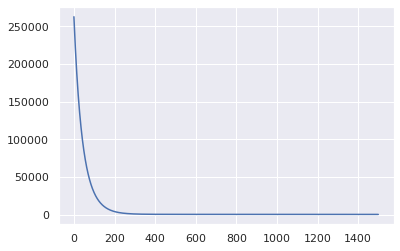

In [96]:
plt.plot(J_storage)

In [330]:
# change target to numpy array
beta = np.array([[646.0787641], [146.4800792], [201.98031254]])

target = df_target.to_numpy()
pred = predict(df_features, beta)

# get predicted values

In [331]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


ValueError: x and y must be the same size

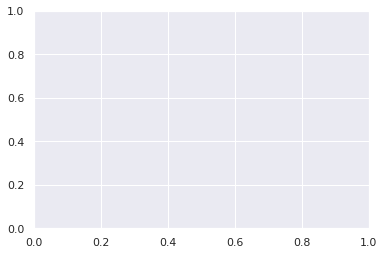

In [332]:
plt.scatter(df_features_test["radius_mean"], target)
plt.scatter(df_features_test["radius_mean"], pred)

In [297]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.985095)

ValueError: Unable to coerce to DataFrame, shape must be (170, 1): given (569, 1)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 1919.164)

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

**Redo HW 4 using Scikit Learn**

In [ ]:
# Read the housing_processed.csv file
df = None

# extract the features from ["RM", "DIS", "INDUS"] and target from []"MEDV"]
df_features, df_target = None, None
# normalize
df_features = None

###
### YOUR CODE HERE
###


In [ ]:
# Split the data into training and test data set using scikit-learn function
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# Instantiate LinearRegression() object
model = None

# Call the fit() method
pass

###
### YOUR CODE HERE
###
print(model.coef_, model.intercept_)
assert np.isclose(model.coef_, [ 5.01417104, -1.00878266, -3.27301726]).all()
assert np.isclose(model.intercept_, 22.45962454)

In [ ]:
# Call the predict() method
pred = None

###
### YOUR CODE HERE
###


In [ ]:
plt.scatter(df_features_test["RM"], df_target_test)
plt.scatter(df_features_test["RM"], pred)

In [ ]:
plt.scatter(df_features_test["DIS"], df_target_test)
plt.scatter(df_features_test["DIS"], pred)

In [ ]:
plt.scatter(df_features_test["INDUS"], df_target_test)
plt.scatter(df_features_test["INDUS"], pred)

In [ ]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.48250)

In [ ]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 52.41451)

**Redo HW7 Using Scikit Learn**

In [ ]:
# Read the file breast_cancer_data.csv
df = None
# extract feature from "radius_mean" and target from "area_mean"
df_feature, df_target = None, None

###
### YOUR CODE HERE
###


In [ ]:
# instantiate a PolynomialFeatures object with degree = 2
poly = None

# call its fit_transform() method
df_features = None

# call train_test_split() to split the data
df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# instantiate LinearRegression() object
model = None

# call its fit() method
pass


### BEGIN SOLUTON
poly = PolynomialFeatures(2)
df_features = poly.fit_transform(df_feature)
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, random_state=100, test_size=0.3)
model = LinearRegression()
model.fit(df_features_train, df_target_train)
### END SOLUTION
print(model.coef_, model.intercept_)
assert np.isclose(model.coef_, [0., 3.69735512, 2.9925278 ]).all()
assert np.isclose(model.intercept_, -32.3684598)

In [ ]:
# Call the predict() method
pred = None

###
### YOUR CODE HERE
###

print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 672.508465)
assert np.isclose(pred.std(), 351.50271)

In [ ]:
plt.scatter(df_features_test[:,1], df_target_test)
plt.scatter(df_features_test[:,1], pred)

In [ ]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.99729)

In [ ]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 346.79479)